In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
data = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

In [4]:
print(data.shape)

(5110, 12)


In [5]:
# View first few rows
print(data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [6]:
# Show basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [7]:
# Show statistical summary of numerical columns
print(data.describe())


                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [8]:
# Group by 'stroke' and count the values in 'smoking_status'
smoking_status_grouped = data.groupby('stroke')['smoking_status'].value_counts()

print(smoking_status_grouped)


stroke  smoking_status 
0       never smoked       1802
        Unknown            1497
        formerly smoked     815
        smokes              747
1       never smoked         90
        formerly smoked      70
        Unknown              47
        smokes               42
Name: count, dtype: int64


In [9]:
# Group by 'stroke' and count the values in 'smoking_status'
smoking_status_counts = data.groupby('stroke')['smoking_status'].value_counts(normalize=True) * 100

# percentage distribution
print(smoking_status_counts)

stroke  smoking_status 
0       never smoked       37.070562
        Unknown            30.796132
        formerly smoked    16.766098
        smokes             15.367208
1       never smoked       36.144578
        formerly smoked    28.112450
        Unknown            18.875502
        smokes             16.867470
Name: proportion, dtype: float64


In [10]:
# Count the number of stroke and non-stroke individuals
stroke_counts = data['stroke'].value_counts()

print(stroke_counts)

stroke
0    4861
1     249
Name: count, dtype: int64


Data Visualization

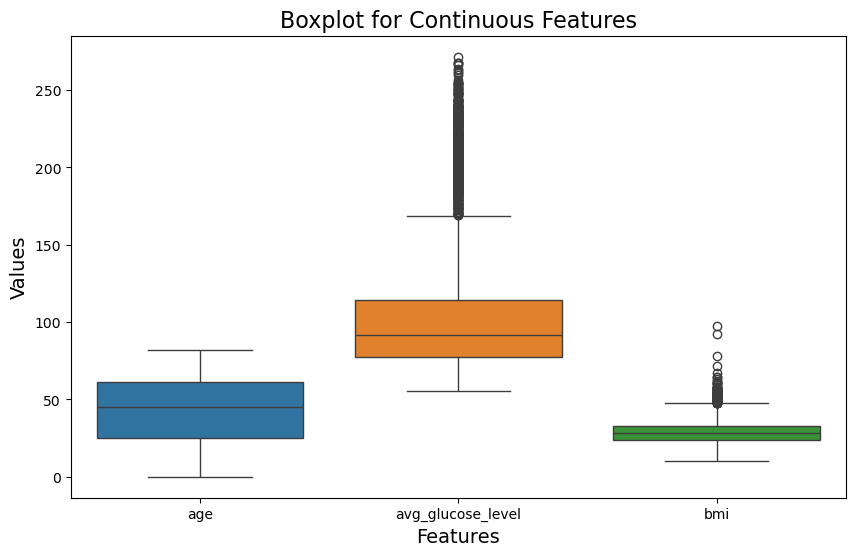

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous features
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot for continuous features
sns.boxplot(data=data[continuous_features])

# Title and labels
plt.title("Boxplot for Continuous Features", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Show the plot
plt.show()


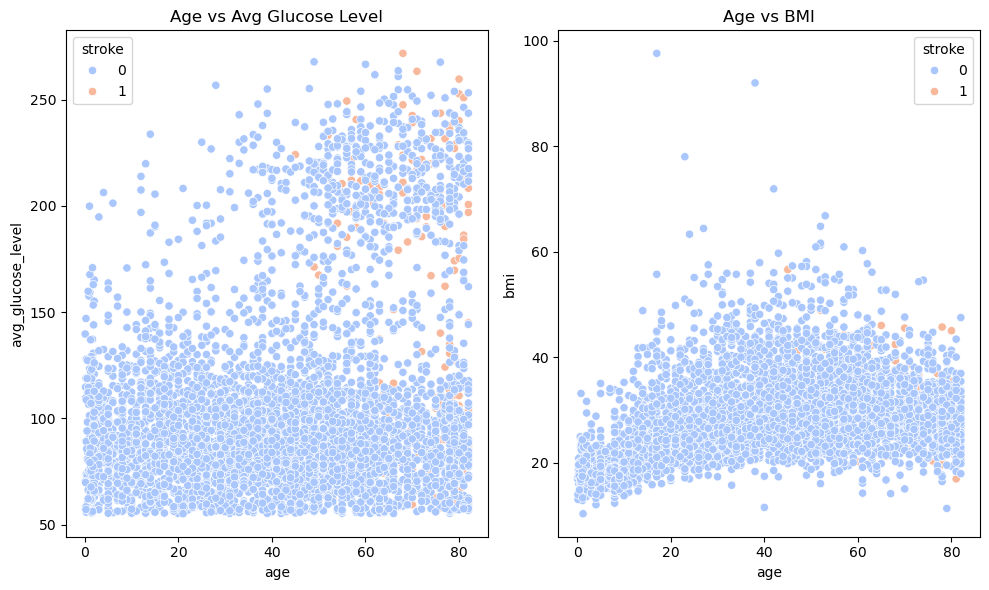

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis for multiple scatter plots
plt.figure(figsize=(10, 6))

# Create scatter plot for 'age' vs 'avg_glucose_level'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.scatterplot(data=data, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm')
plt.title('Age vs Avg Glucose Level')

# Create scatter plot for 'age' vs 'bmi'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.scatterplot(data=data, x='age', y='bmi', hue='stroke', palette='coolwarm')
plt.title('Age vs BMI')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


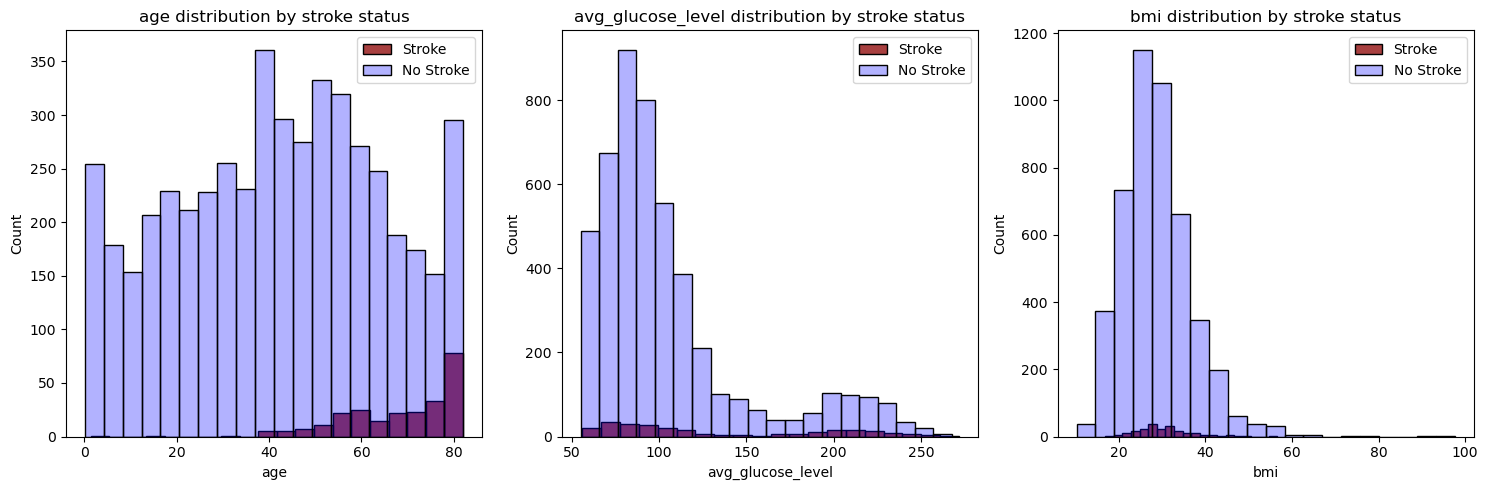

In [13]:
# List of numeric columns
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

# Plot histograms for each numeric column
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[data['stroke'] == 1][col], bins=20, color='darkred', label='Stroke')
    sns.histplot(data[data['stroke'] == 0][col], bins=20, color='blue', alpha= 0.3, label='No Stroke')
    plt.title(f'{col} distribution by stroke status')
    plt.legend()

plt.tight_layout()
plt.show()

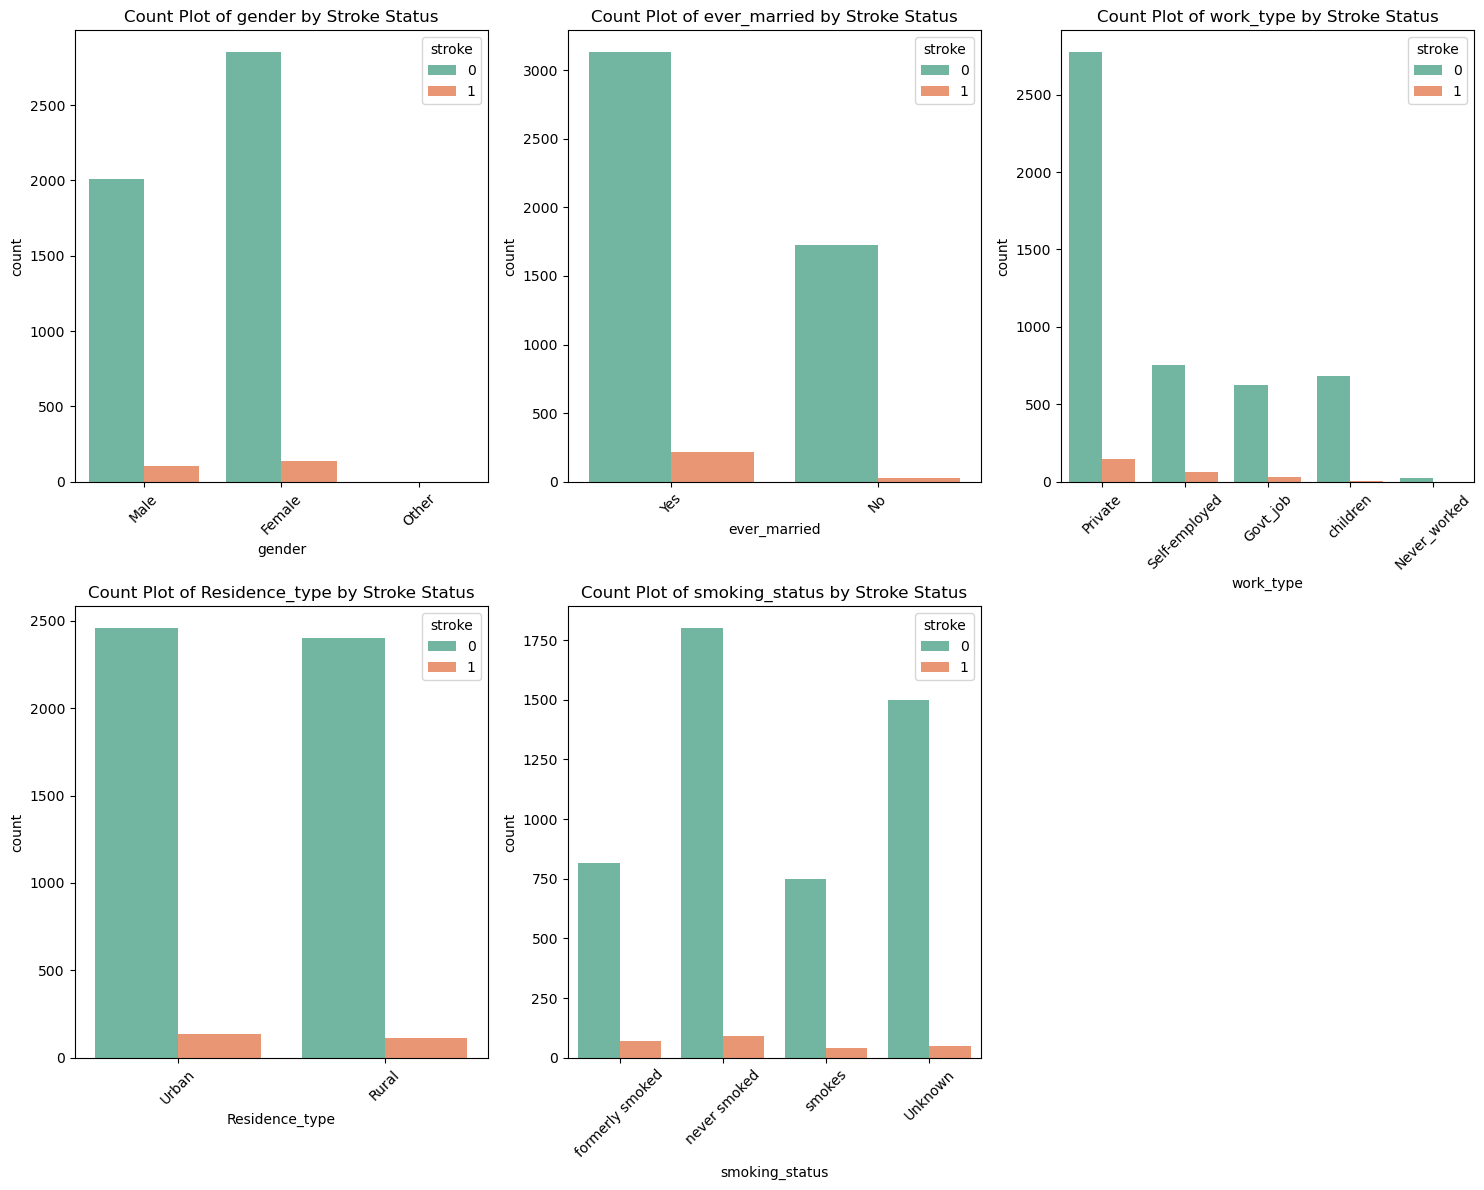

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of non-numeric columns (categorical)
non_numeric_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot count plots for each non-numeric column by stroke status
plt.figure(figsize=(15, 12))
for i, col in enumerate(non_numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=col, hue='stroke', palette='Set2')
    plt.title(f'Count Plot of {col} by Stroke Status')
    plt.xticks(rotation=45)  # Rotate x-axis labels 

plt.tight_layout()
plt.show()


In [15]:
grouped_heart = data.groupby('heart_disease')['stroke'].mean().reset_index()
grouped_heart

,heart_disease,stroke
0,0,0.041787
1,1,0.170290


In [16]:
grouped_heart['stroke_percent'] = grouped_heart['stroke'] * 100
grouped_heart

,heart_disease,stroke,stroke_percent
0,0,0.041787,4.178734
1,1,0.170290,17.028986


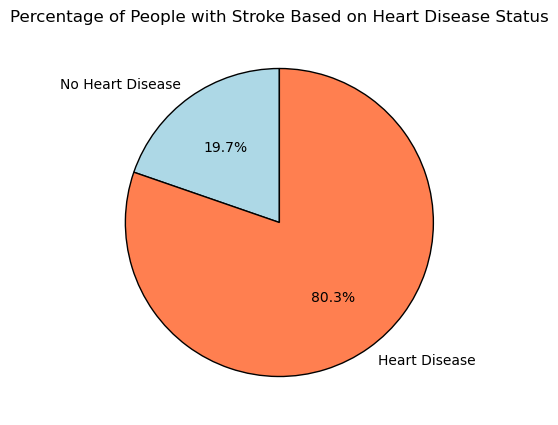

In [17]:
# Create a pie chart for stroke percentages
plt.figure(figsize=(5, 5))

# Labels and values for the pie chart
labels = ['No Heart Disease', 'Heart Disease']
sizes = grouped_heart['stroke_percent']
colors = ['lightblue', 'coral']  # Custom colors for the pie chart

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title of the pie chart
plt.title('Percentage of People with Stroke Based on Heart Disease Status')

# Display the pie chart
plt.show()

In [18]:
grouped_hypert = data.groupby('hypertension')['stroke'].mean().reset_index()
grouped_hypert

,hypertension,stroke
0,0,0.039679
1,1,0.132530


In [19]:
grouped_hypert['stroke_percent'] = grouped_hypert['stroke'] * 100
grouped_hypert

,hypertension,stroke,stroke_percent
0,0,0.039679,3.967910
1,1,0.132530,13.253012


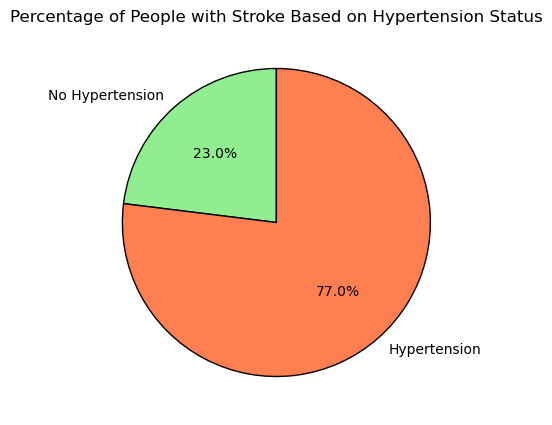

In [21]:
# Create a pie chart for stroke percentages
plt.figure(figsize=(5, 5))

# Labels and values for the pie chart
labels = ['No Hypertension', 'Hypertension']
sizes = grouped_hypert['stroke_percent']
colors = ['lightgreen', 'coral']  # Custom colors for the pie chart

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title of the pie chart
plt.title('Percentage of People with Stroke Based on Hypertension Status')

# Display the pie chart
plt.show()

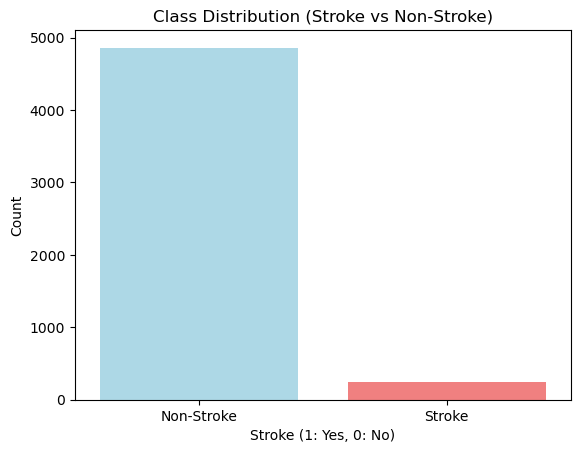

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each class (0: Non-Stroke, 1: Stroke)
sns.set_palette("pastel")

ax = sns.countplot(x='stroke', data=data)

# Non-Stroke: lightblue, Stroke: lightcoral
ax.patches[0].set_facecolor('lightblue')  # Non-Stroke
ax.patches[1].set_facecolor('lightcoral')  # Stroke

# Adding title and labels
plt.title('Class Distribution (Stroke vs Non-Stroke)')
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.ylabel('Count')

plt.xticks([0, 1], ['Non-Stroke', 'Stroke'])

plt.show()
